In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [62]:
def parseMatrixFromFile(fname):
    with open(fname) as f:
        for l in f:
            #print(l)
            yield [float(x) for x in l.strip().split()]

In [64]:
rhythm_data_ = list(parseMatrixFromFile("mus_dataset_2.txt"))

rhythm_data_ = rhythm_data_[0]

In [65]:
len(rhythm_data_)

221

In [66]:
memory = 10

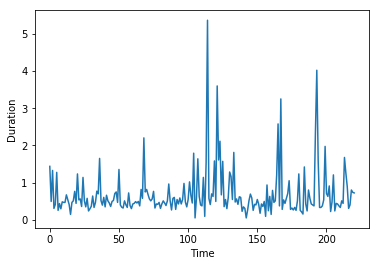

In [68]:
x = [i for (i,x) in enumerate(rhythm_data_)]

plt.plot(x,rhythm_data_)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()

In [69]:
raw_data = np.reshape(rhythm_data_,(len(rhythm_data_),1))

In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(raw_data)

In [71]:
np.shape(dataset)

(221, 1)

In [72]:
train_size = len(dataset)

In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return dataX, dataY

In [74]:
# reshape into X=t and Y=t+1
look_back = memory
X_train, Y_train = create_dataset(dataset, look_back)
trainX = np.array(X_train)
trainY = np.array(Y_train)

In [77]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [78]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, memory)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0160
Epoch 2/100
1s - loss: 0.0146
Epoch 3/100
1s - loss: 0.0144
Epoch 4/100
1s - loss: 0.0143
Epoch 5/100
1s - loss: 0.0144
Epoch 6/100
1s - loss: 0.0141
Epoch 7/100
1s - loss: 0.0139
Epoch 8/100
1s - loss: 0.0140
Epoch 9/100
1s - loss: 0.0139
Epoch 10/100
1s - loss: 0.0139
Epoch 11/100
1s - loss: 0.0139
Epoch 12/100
1s - loss: 0.0139
Epoch 13/100
1s - loss: 0.0137
Epoch 14/100
1s - loss: 0.0137
Epoch 15/100
1s - loss: 0.0136
Epoch 16/100
1s - loss: 0.0135
Epoch 17/100
1s - loss: 0.0136
Epoch 18/100
1s - loss: 0.0135
Epoch 19/100
1s - loss: 0.0135
Epoch 20/100
1s - loss: 0.0135
Epoch 21/100
1s - loss: 0.0135
Epoch 22/100
1s - loss: 0.0136
Epoch 23/100
1s - loss: 0.0133
Epoch 24/100
1s - loss: 0.0133
Epoch 25/100
1s - loss: 0.0132
Epoch 26/100
1s - loss: 0.0135
Epoch 27/100
1s - loss: 0.0133
Epoch 28/100
1s - loss: 0.0133
Epoch 29/100
1s - loss: 0.0132
Epoch 30/100
1s - loss: 0.0132
Epoch 31/100
1s - loss: 0.0134
Epoch 32/100
1s - loss: 0.0133
Epoch 33/100
1s -

In [79]:
# make predictions
trainPredict = model.predict(trainX)

In [80]:
np.shape(trainPredict)

(210, 1)

In [81]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

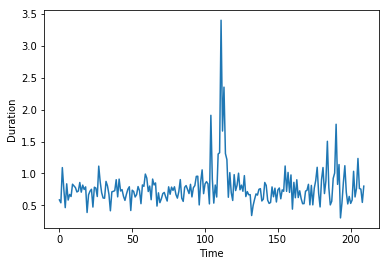

In [110]:
x = [i for (i,x) in enumerate(trainPredict[0:])]
plt.plot(x,trainPredict[0:])
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()

In [98]:
np.shape(trainY)

(1, 210)

In [82]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.55 RMSE


In [113]:
generated_rhythm = []
# Should be a multiple of len(rhythm_data[0])
num_samples = train_size

# fix random seed for reproducibility
#np.random.seed(7)
start = np.random.randint(0, train_size-1)
pattern_raw = list(X_train[0])
pattern = np.array(pattern_raw)
print("Seed:")
print(pattern)

# generate sequence with a random seed
for i in range(num_samples):
    x = np.reshape(pattern, (1, 1, len(pattern)))
    
    prediction = model.predict(x, verbose=0)
    fr = scaler.inverse_transform(prediction)
    
    print(prediction,"----------------",fr)
    generated_rhythm.append(fr[0,0])
    pattern_raw.append(prediction)
    pattern_raw = pattern_raw[1:len(pattern_raw)]
    pattern = np.array(pattern_raw)
print("Generation Completed!")

Seed:
[ 0.26078431  0.08333333  0.24019608  0.04803922  0.06862745  0.23039216
  0.03823529  0.07254902  0.04607843  0.08137255]
(array([[ 0.10015723]], dtype=float32), '----------------', array([[ 0.58416861]], dtype=float32))
(array([[ 0.09897956]], dtype=float32), '----------------', array([[ 0.57791221]], dtype=float32))
(array([[ 0.20500532]], dtype=float32), '----------------', array([[ 1.14117408]], dtype=float32))
(array([[ 0.16105607]], dtype=float32), '----------------', array([[ 0.90769368]], dtype=float32))
(array([[ 0.10172907]], dtype=float32), '----------------', array([[ 0.59251899]], dtype=float32))
(array([[ 0.16880327]], dtype=float32), '----------------', array([[ 0.94885075]], dtype=float32))
(array([[ 0.14102429]], dtype=float32), '----------------', array([[ 0.8012749]], dtype=float32))
(array([[ 0.13887729]], dtype=float32), '----------------', array([[ 0.78986889]], dtype=float32))
(array([[ 0.14544004]], dtype=float32), '----------------', array([[ 0.82473356]

(array([[ 0.14300574]], dtype=float32), '----------------', array([[ 0.81180131]], dtype=float32))
(array([[ 0.14302434]], dtype=float32), '----------------', array([[ 0.81190014]], dtype=float32))
(array([[ 0.14302815]], dtype=float32), '----------------', array([[ 0.8119204]], dtype=float32))
(array([[ 0.14301533]], dtype=float32), '----------------', array([[ 0.81185222]], dtype=float32))
(array([[ 0.14301345]], dtype=float32), '----------------', array([[ 0.81184226]], dtype=float32))
(array([[ 0.14302844]], dtype=float32), '----------------', array([[ 0.81192189]], dtype=float32))
(array([[ 0.14302069]], dtype=float32), '----------------', array([[ 0.81188077]], dtype=float32))
(array([[ 0.14301433]], dtype=float32), '----------------', array([[ 0.81184691]], dtype=float32))
(array([[ 0.14302057]], dtype=float32), '----------------', array([[ 0.81188011]], dtype=float32))
(array([[ 0.1430259]], dtype=float32), '----------------', array([[ 0.81190842]], dtype=float32))
(array([[ 0.

(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302009]], dtype=float32), '----------------', array([[ 0.81187755]], dtype=float32))
(array([[ 0.14302009]], dtype=float32), '----------------', array([[ 0.81187755]], dtype=float32))
(array([[ 0.14302008]], dtype=float32), '----------------', array([[ 0.81187749]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 0.14302006]], dtype=float32), '----------------', array([[ 0.81187743]], dtype=float32))
(array([[ 

In [114]:
len(generated_rhythm)

221

In [115]:
print(generated_rhythm)

[0.58416861, 0.57791221, 1.1411741, 0.90769368, 0.59251899, 0.94885075, 0.8012749, 0.78986889, 0.82473356, 0.93398434, 0.86940116, 0.75578201, 0.82722414, 0.90019828, 0.75626647, 0.83132541, 0.85554355, 0.8170616, 0.77924478, 0.81976491, 0.83744788, 0.80205446, 0.79288179, 0.84773308, 0.80440968, 0.79609716, 0.81715333, 0.82607979, 0.80233359, 0.80734354, 0.821464, 0.81609052, 0.79788309, 0.81846082, 0.81782085, 0.80739474, 0.80797714, 0.81862682, 0.81156075, 0.80750543, 0.81243986, 0.81722051, 0.80791891, 0.81058329, 0.8147549, 0.81249189, 0.80867261, 0.81319612, 0.81355375, 0.8108111, 0.81028849, 0.81403583, 0.81178957, 0.81054068, 0.81218225, 0.81316984, 0.81087619, 0.81145966, 0.81261551, 0.81218982, 0.81089479, 0.81223541, 0.81238562, 0.81152403, 0.81147069, 0.81244957, 0.81187534, 0.81151438, 0.8119213, 0.81226468, 0.81159836, 0.81174093, 0.81210178, 0.81195754, 0.81160796, 0.81196874, 0.81201941, 0.81178862, 0.81175393, 0.81203789, 0.81188488, 0.81176865, 0.8118909, 0.81198561, 

In [ ]:
def write_to_file(filename, arg_list):
    file = open(filename, 'w')
    for item in arg_list:
        file.write(str(item)+" ")
    file.close()
    print("Output dumped to file ",filename)

In [ ]:
write_to_file("mus_dataset_2_output.txt",generated_rhythm)

In [116]:
final_result = np.reshape(generated_rhythm,(len(generated_rhythm)))

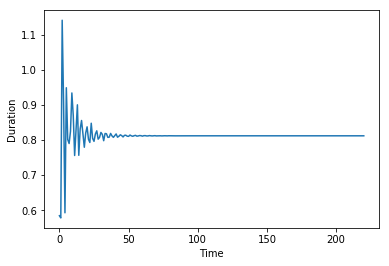

In [117]:
x = [i for (i,x) in enumerate(final_result)]
plt.plot(x,final_result)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()